In [457]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
from datetime import datetime

import textstat
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score, precision_score,log_loss, make_scorer, roc_curve, plot_roc_curve, precision_score, auc
plt.style.use('ggplot')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

from string import punctuation
import nltk
from nltk.text import Text
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer, porter
from nltk.stem.porter import PorterStemmer

In [4]:
def makeframe_fromtxt(inp, ind=None):
    df = pd.DataFrame(list(ast.literal_eval(open(inp, 'r').read())))
    if ind:
        df.sort_values(ind, inplace = True)
        df.set_index(ind, inplace = True)
    return df

In [8]:
imdbmfdf = pd.read_csv('imdb_mov_filtered.zip')

In [7]:
tmddf1 = makeframe_fromtxt('tmd_data_01_on_04_03_2021.txt')

In [11]:
tmddf1.rename(columns={'imdb_id':'tconst'}, inplace=True)

In [10]:
tmddf1 = tmddf1.merge(imdbmfdf, on='tconst', how='inner')

In [12]:
tmddf1

,adult,backdrop_path,belongs_to_collection,budget,genres_x,homepage,id,tconst,original_language,original_title,...,title_y,region,language,types,attributes,isOriginalTitle,directors,writers,averageRating,numVotes
0,False,/hQ4pYsIbP22TMXOUdSfC2mjWrO0.jpg,None,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",,2,tt0094675,fi,Ariel,...,Ariel,US,NaN,imdbDisplay,NaN,0,nm0442454,nm0442454,7.5,6265
1,False,/l94l89eMmFKh7na2a1u5q67VgNx.jpg,None,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",,3,tt0092149,fi,Varjoja paratiisissa,...,Shadows in Paradise,US,NaN,imdbDisplay,NaN,0,nm0442454,nm0442454,7.5,4902
2,False,/u0zMKKpEdDWpOKmFW2sLbKKICJH.jpg,None,4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",,5,tt0113101,en,Four Rooms,...,Four Rooms,US,NaN,NaN,NaN,0,"nm0001675,nm0005062,nm0025978,nm0000233,nm0734319","nm0025978,nm0734319,nm0001675,nm0000233",6.8,98955
3,False,/5aXp2s4l6g5PcMMesIj63mx8hmJ.jpg,None,21000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",,6,tt0107286,en,Judgment Night,...,Judgment Night,US,NaN,imdbDisplay,NaN,0,nm0394280,"nm0171474,nm0192342",6.7,15567
4,False,/zqkmTXzjkAgXmEWLRsY4UpTWCeo.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",11000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,11,tt0076759,en,Star Wars,...,Star Wars: Episode IV - A New Hope,US,NaN,imdbDisplay,NaN,0,nm0000184,nm0000184,8.6,1242564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82944,False,/dzfiE2VHY362dGI62XfZ2iI87CT.jpg,None,7000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.fantasyisland.movie/,539537,tt0983946,en,Fantasy Island,...,Fantasy Island,US,NaN,imdbDisplay,NaN,0,nm0905592,"nm0905592,nm1496753,nm3273842,nm0506215",4.9,38561
82945,False,/4X7HvsfnwAMWPEoLU8PK2PMQBm9.jpg,None,0,"[{'id': 27, 'name': 'Horror'}, {'id': 80, 'nam...",https://shoutstudios.shoutfactory.com/ill-take...,539549,tt7962932,en,I'll Take Your Dead,...,I'll Take Your Dead,US,NaN,imdbDisplay,NaN,0,nm2029106,"nm2029106,nm3884562",5.7,3162
82946,False,None,None,0,"[{'id': 10752, 'name': 'War'}, {'id': 18, 'nam...",,539563,tt0025581,fr,Les nuits moscovites,...,Moscow Nights,US,NaN,NaN,NaN,0,nm0335207,"nm0072315,nm0467396,nm0622148",5.8,53
82947,False,/lr2XX6fUrYvNu7nUMzMTTuoNBm8.jpg,None,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",https://a24films.com/films/zola,539565,tt5439812,en,Zola,...,Zola,US,NaN,imdbDisplay,NaN,0,nm1891632,"nm1891632,nm4925405,nm10935584,nm6365846",5.8,276


In [13]:
drpcol = ['isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres_x', 'title_x', 'vote_average', 'vote_count', 'video', 'Unnamed: 0', 'titleType']

In [14]:
tmddf1 = tmddf1.drop(drpcol, axis=1)

In [36]:
tmddf1

,adult,backdrop_path,belongs_to_collection,budget,homepage,id,tconst,original_language,original_title,overview,...,title_y,region,language,types,attributes,isOriginalTitle,directors,writers,averageRating,numVotes
0,False,/hQ4pYsIbP22TMXOUdSfC2mjWrO0.jpg,None,0,,2,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,...,Ariel,US,NaN,imdbDisplay,NaN,0,nm0442454,nm0442454,7.5,6265
1,False,/l94l89eMmFKh7na2a1u5q67VgNx.jpg,None,0,,3,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",...,Shadows in Paradise,US,NaN,imdbDisplay,NaN,0,nm0442454,nm0442454,7.5,4902
2,False,/u0zMKKpEdDWpOKmFW2sLbKKICJH.jpg,None,4000000,,5,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,...,Four Rooms,US,NaN,NaN,NaN,0,"nm0001675,nm0005062,nm0025978,nm0000233,nm0734319","nm0025978,nm0734319,nm0001675,nm0000233",6.8,98955
3,False,/5aXp2s4l6g5PcMMesIj63mx8hmJ.jpg,None,21000000,,6,tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",...,Judgment Night,US,NaN,imdbDisplay,NaN,0,nm0394280,"nm0171474,nm0192342",6.7,15567
4,False,/zqkmTXzjkAgXmEWLRsY4UpTWCeo.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",11000000,http://www.starwars.com/films/star-wars-episod...,11,tt0076759,en,Star Wars,Princess Leia is captured and held hostage by ...,...,Star Wars: Episode IV - A New Hope,US,NaN,imdbDisplay,NaN,0,nm0000184,nm0000184,8.6,1242564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82944,False,/dzfiE2VHY362dGI62XfZ2iI87CT.jpg,None,7000000,http://www.fantasyisland.movie/,539537,tt0983946,en,Fantasy Island,A group of contest winners arrive at an island...,...,Fantasy Island,US,NaN,imdbDisplay,NaN,0,nm0905592,"nm0905592,nm1496753,nm3273842,nm0506215",4.9,38561
82945,False,/4X7HvsfnwAMWPEoLU8PK2PMQBm9.jpg,None,0,https://shoutstudios.shoutfactory.com/ill-take...,539549,tt7962932,en,I'll Take Your Dead,William has a simple job: he makes dead bodies...,...,I'll Take Your Dead,US,NaN,imdbDisplay,NaN,0,nm2029106,"nm2029106,nm3884562",5.7,3162
82946,False,None,None,0,,539563,tt0025581,fr,Les nuits moscovites,"During the First World War, the Russian office...",...,Moscow Nights,US,NaN,NaN,NaN,0,nm0335207,"nm0072315,nm0467396,nm0622148",5.8,53
82947,False,/lr2XX6fUrYvNu7nUMzMTTuoNBm8.jpg,None,0,https://a24films.com/films/zola,539565,tt5439812,en,Zola,A waitress agrees to accompany an exotic dance...,...,Zola,US,NaN,imdbDisplay,NaN,0,nm1891632,"nm1891632,nm4925405,nm10935584,nm6365846",5.8,276


In [17]:
# You can run this script and see the results. Example output is also included
# for each question. Note that there is randomness involved (both in how the
# data is split and also in the Random Forest), so you will not always get
# exactly the same results.
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from roc import plot_roc
plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [384]:
y = tmddf1['averageRating']
X = tmddf1.drop(columns=['averageRating'])

In [385]:
y = y.replace(to_replace=['\\N'], value=[None])
y = y.where(y.notnull(), None)
X = X.replace(to_replace=['\\N'], value=[None])
X = X.where(X.notnull(), None)

In [386]:
X.drop(columns=['id','tconst', 'original_title', 'overview',
                'ordering', 'title_y', 'region','types', 'attributes',
                'isOriginalTitle', 'directors', 'writers'], inplace=True)

In [315]:
gnrst=set()
for g in X['genres_y'].unique():
    if g:
        gnrst.update(g.split(','))

In [316]:
gnrst

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western'}

In [317]:
gnrls = list(gnrst)

In [318]:
gnrls = sorted(gnrls)

In [319]:
gnrls

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

In [387]:
genre_labels = ['gnr_Action', 'gnr_Adult', 'gnr_Adventure', 'gnr_Animation', 'gnr_Biography',
  'gnr_Comedy', 'gnr_Crime', 'gnr_Documentary', 'gnr_Drama', 'gnr_Family', 'gnr_Fantasy',
  'gnr_Film-Noir', 'gnr_History', 'gnr_Horror', 'gnr_Music', 'gnr_Musical', 'gnr_Mystery',
  'gnr_News', 'gnr_Reality-TV', 'gnr_Romance', 'gnr_Sci-Fi', 'gnr_Short',
  'gnr_Sport', 'gnr_Talk-Show', 'gnr_Thriller', 'gnr_War', 'gnr_Western']

In [321]:
gz = zip(gnrls, genre_labels)

In [322]:
for item in genre_labels:
    X[item] = None

In [ ]:
for gns, gnl in zip(gnrls, genre_labels):
    print(f'gns: {gns}, gnl: {gnl}')

In [323]:
X['gnr_Action']

0        None
1        None
2        None
3        None
4        None
         ... 
82944    None
82945    None
82946    None
82947    None
82948    None
Name: gnr_Action, Length: 82949, dtype: object

In [218]:
'Comedy,Crime,Romance'.find('Drama')

-1

In [353]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82949 entries, 0 to 82948
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  82949 non-null  bool   
 1   backdrop_path          45048 non-null  object 
 2   belongs_to_collection  5466 non-null   object 
 3   budget                 82949 non-null  int64  
 4   homepage               76506 non-null  object 
 5   original_language      82949 non-null  object 
 6   popularity             82949 non-null  object 
 7   poster_path            69047 non-null  object 
 8   production_companies   82949 non-null  object 
 9   production_countries   82949 non-null  object 
 10  release_date           82949 non-null  object 
 11  revenue                82949 non-null  int64  
 12  runtime                81081 non-null  object 
 13  spoken_languages       82949 non-null  object 
 14  status                 82949 non-null  object 
 15  ta

In [388]:
for gns, gnl in zip(gnrls, genre_labels):
    #X[gnl] = X[gnl].where(X[gnl]!=None, 0)  
    #X[gnl] = X[gnl].where(X[gnl].notnull(), 0)
    #X[gnl].fillna(value=0, inplace=True)
    X[gnl] = X['genres_y'].str.contains(gns)
    X[gnl].replace({True:1, False:0}, inplace=True)
    X[gnl] = X[gnl].where(X[gnl]==1, 0)
    X[gnl].astype('int32')
    # print(f'gns: {gns}, gnl: {gnl}')
     


In [389]:
X['gnr_Drama'].unique()

array([0., 1.])

In [390]:
X

,adult,backdrop_path,belongs_to_collection,budget,homepage,original_language,popularity,poster_path,production_companies,production_countries,...,gnr_News,gnr_Reality-TV,gnr_Romance,gnr_Sci-Fi,gnr_Short,gnr_Sport,gnr_Talk-Show,gnr_Thriller,gnr_War,gnr_Western
0,False,/hQ4pYsIbP22TMXOUdSfC2mjWrO0.jpg,None,0,,fi,8.974,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg,"[{'id': 2303, 'logo_path': None, 'name': 'Vill...","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,False,/l94l89eMmFKh7na2a1u5q67VgNx.jpg,None,0,,fi,7.779,/nj01hspawPof0mJmlgfjuLyJuRN.jpg,"[{'id': 2303, 'logo_path': None, 'name': 'Vill...","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,False,/u0zMKKpEdDWpOKmFW2sLbKKICJH.jpg,None,4000000,,en,13.645,/75aHn1NOYXh4M7L5shoeQ6NGykP.jpg,"[{'id': 14, 'logo_path': '/m6AHu84oZQxvq7n1rsv...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,False,/5aXp2s4l6g5PcMMesIj63mx8hmJ.jpg,None,21000000,,en,9.942,/rYFAvSPlQUCebayLcxyK79yvtvV.jpg,"[{'id': 33, 'logo_path': '/8lvHyhjr8oUKOOy2dKX...","[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,False,/zqkmTXzjkAgXmEWLRsY4UpTWCeo.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",11000000,http://www.starwars.com/films/star-wars-episod...,en,68.974,/6FfCtAuVAW8XJjZ7eWeLibRLWTw.jpg,"[{'id': 1, 'logo_path': '/o86DbpburjxrqAzEDhXZ...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82944,False,/dzfiE2VHY362dGI62XfZ2iI87CT.jpg,None,7000000,http://www.fantasyisland.movie/,en,32.35,/8ZMrZGGW65ePWIgRn1260nA1uUm.jpg,"[{'id': 3172, 'logo_path': '/kDedjRZwO8uyFhuHa...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82945,False,/4X7HvsfnwAMWPEoLU8PK2PMQBm9.jpg,None,0,https://shoutstudios.shoutfactory.com/ill-take...,en,16.903,/bhOtz1wKwXWzhx3Z3IxtvbZFf4o.jpg,"[{'id': 9315, 'logo_path': None, 'name': 'Blac...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82946,False,None,None,0,,fr,0.681,/28CNosxi4p88LCuZYg5wGEVr3K3.jpg,[],[],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82947,False,/lr2XX6fUrYvNu7nUMzMTTuoNBm8.jpg,None,0,https://a24films.com/films/zola,en,10.49,/va07lzmyEejsb2GC4fwmUgofbLs.jpg,"[{'id': 77221, 'logo_path': None, 'name': 'Gig...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [400]:
X['backdrop_p_bl'] = X['backdrop_path']
X['backdrop_p_bl'].replace({False:0},inplace=True)
X['backdrop_p_bl'] = X['backdrop_p_bl'].where(X['backdrop_p_bl']==0,1)

X['belongs_to_c_bl'] = X['belongs_to_collection']
X['belongs_to_c_bl'].replace({False:0},inplace=True)
X['belongs_to_c_bl'] = X['belongs_to_c_bl'].where(X['belongs_to_c_bl']==0,1)

X['homepage_bl'] = X['homepage']
X['homepage_bl'].replace({"":0},inplace=True)
X['homepage_bl'] = X['homepage_bl'].where(X['homepage_bl']==0,1)

X['poster_p_bl'] = X['poster_path']
X['poster_p_bl'].replace({"":0},inplace=True)
X['poster_p_bl'] = X['poster_p_bl'].where(X['poster_p_bl']==0,1)

X['tagline_bl'] = X['tagline']
X['tagline_bl'].replace({"":0},inplace=True)
X['tagline_bl'] = X['tagline_bl'].where(X['tagline_bl']==0,1)



In [404]:
X.drop(['adult', 'genres_y', 'backdrop_path',
        'belongs_to_collection', 'homepage', 'poster_path', 'tagline'], axis=1, inplace=True)

In [407]:
# TEMPORARY DROP FILTER for categories I do not yet know what to do with.
# X.drop(['production_companies', 'production_countries'], axis=1, inplace=True)

In [409]:
# Dropping columns for dummies
X.drop(['primaryTitle', 'originalTitle',
        'spoken_languages', 'status', 'language'], axis=1, inplace=True)

In [429]:
# Dropping for emergency
X.drop(['release_date'], axis=1, inplace=True)

In [411]:
X['original_language'].unique()

array(['fi', 'en', 'de', 'ja', 'es', 'zh', 'da', 'fr', 'ko', 'pl', 'sv',
       'it', 'bs', 'hi', 'no', 'ru', 'pt', 'nl', 'cs', 'bn', 'cn', 'af',
       'sr', 'et', 'is', 'he', 'ro', 'hu', 'se', 'fa', 'th', 'tr', 'ar',
       'el', 'id', 'ab', 'xx', 'bo', 'mk', 'vi', 'aa', 'ta', 'sh', 'te',
       'nb', 'sk', 'ms', 'uk', 'mr', 'ur', 'lt', 'hr', 'sl', 'tl', 'hy',
       'dz', 'kn', 'ca', 'la', 'ku', 'gl', 'rw', 'ky', 'eo', 'ka', 'jv',
       'ml', 'bg', 'bm', 'wo', 'sm', 'eu', 'si', 'ln', 'yi', 'gd', 'sw',
       'pa', 'km', 'mn', 'am', 'qu', 'lo', 'iu', 'fy', 'ne', 'sq', 'cy',
       'tg', 'az', 'mi', 'fo', 'ch', 'sa', 'kk', 'so', 'lv', 'gu', 'mg',
       'ny', 'as', 'xh', 'cr', 'zu', 'kg', 'ga', 'ha', 'be', 'rm'],
      dtype=object)

In [412]:
X['release_date']

0        1988-10-21
1        1986-10-17
2        1995-12-09
3        1993-10-15
4        1977-05-25
            ...    
82944    2020-02-12
82945    2018-10-01
82946    1935-02-08
82947    2021-06-30
82948    1927-10-01
Name: release_date, Length: 82949, dtype: object

In [413]:
'1988-10-21'.strftime('%s')

AttributeError: 'str' object has no attribute 'strftime'

In [418]:
test = X['release_date']

In [417]:
int(datetime.strptime('1988-10-21', '%Y-%m-%d').strftime('%s'))

593409600

In [425]:
test.apply(lambda x: int(datetime.strptime(x, '%Y-%m-%d').strftime('%s')) if x!= '')

SyntaxError: invalid syntax (<ipython-input-425-0861dabb3380>, line 1)

In [430]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82949 entries, 0 to 82948
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             82949 non-null  int64  
 1   original_language  82949 non-null  object 
 2   popularity         82949 non-null  object 
 3   revenue            82949 non-null  int64  
 4   runtime            81081 non-null  object 
 5   numVotes           82949 non-null  int64  
 6   gnr_Action         82949 non-null  float64
 7   gnr_Adult          82949 non-null  float64
 8   gnr_Adventure      82949 non-null  float64
 9   gnr_Animation      82949 non-null  float64
 10  gnr_Biography      82949 non-null  float64
 11  gnr_Comedy         82949 non-null  float64
 12  gnr_Crime          82949 non-null  float64
 13  gnr_Documentary    82949 non-null  float64
 14  gnr_Drama          82949 non-null  float64
 15  gnr_Family         82949 non-null  float64
 16  gnr_Fantasy        829

In [431]:
X

,budget,original_language,popularity,revenue,runtime,numVotes,gnr_Action,gnr_Adult,gnr_Adventure,gnr_Animation,...,gnr_Sport,gnr_Talk-Show,gnr_Thriller,gnr_War,gnr_Western,backdrop_p_bl,belongs_to_c_bl,homepage_bl,poster_p_bl,tagline_bl
0,0,fi,8.974,0,73.0,6265,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,0,1,0
1,0,fi,7.779,0,74.0,4902,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,0,1,0
2,4000000,en,13.645,4257354,98.0,98955,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,0,1,1
3,21000000,en,9.942,12136938,110.0,15567,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,0,1,1
4,11000000,en,68.974,775398007,121.0,1242564,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82944,7000000,en,32.35,47078545,109.0,38561,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
82945,0,en,16.903,0,85.0,3162,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
82946,0,fr,0.681,0,0.0,53,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,0,1,0
82947,0,en,10.49,0,90.0,276,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,1,1,0


In [439]:
# To expand into dummies: language, original_language, genres_y
X = pd.get_dummies(X, columns=['original_language'])

In [441]:
X['original_language']

KeyError: 'original_language'

In [ ]:
# To use towards word analysis: title_y, overview


In [81]:
# X['directors'].value_counts()

nm0627864              181
nm0782947              127
nm0064415              117
nm0484645              115
nm0437356              110
                      ... 
nm1981319                1
nm2329407                1
nm1140661                1
nm0678646                1
nm7786266,nm2561949      1
Name: directors, Length: 38085, dtype: int64

In [73]:
X.shape

(82949, 33)

In [88]:
X['genres_y']

0            Comedy,Crime,Romance
1            Comedy,Drama,Romance
2                          Comedy
3              Action,Crime,Drama
4        Action,Adventure,Fantasy
                   ...           
82944    Action,Adventure,Fantasy
82945                      Horror
82946                       Drama
82947          Comedy,Crime,Drama
82948                       Drama
Name: genres_y, Length: 82949, dtype: object

In [33]:
X.drop(columns=['tconst', 'id'], inplace=True)

In [444]:
X.isnull().sum().sum()

1868

In [449]:
X.isnull().sum()

budget                     0
popularity                 0
revenue                    0
runtime                 1868
numVotes                   0
                        ... 
original_language_xh       0
original_language_xx       0
original_language_yi       0
original_language_zh       0
original_language_zu       0
Length: 146, dtype: int64

In [452]:
X['runtime']

0         73.0
1         74.0
2         98.0
3        110.0
4        121.0
         ...  
82944    109.0
82945     85.0
82946      0.0
82947     90.0
82948     None
Name: runtime, Length: 82949, dtype: object

In [453]:
X['runtime'] = X['runtime'].where(X['runtime'].notnull(), 0.0)

In [454]:
X.isnull().sum()

budget                  0
popularity              0
revenue                 0
runtime                 0
numVotes                0
                       ..
original_language_xh    0
original_language_xx    0
original_language_yi    0
original_language_zh    0
original_language_zu    0
Length: 146, dtype: int64

In [458]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [464]:
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [477]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

In [ ]:
rfr.score(X_test, y_test)

In [470]:
test_predictions = rfr.predict(X_test)

In [471]:
test_predictions

array([4.791, 6.648, 5.943, ..., 6.95 , 5.349, 5.495])

# What makes a good movie?
## A Brief Movie Rating Analysis with TMDb and IMDb

# Premise of the Analysis
Movies are ubiquitous to many of us, whether we hear about box office performance on the news or know someone who binges one movie per day on average. There are times you may question what makes a movie sell so well, or whether or not a movie really is worth your time. The goal of this analysis is to at minimum attempt to predict what factors into 

# Data Sources and Background
The data is sourced across two different sources: The Movie Database, and the Internet Movie Database.

The Internet Movie Database is popular for general viewers by an order of magnitude approaching 60 times more reviews than The Movie Database, and catalogues not only movies but games, online videos, and more. The IMDb also keeps track of different distribution names for the same movie, as well as releases per national region.

The Movie Database was built with datakeeping in mind: data is more verbose and granular, and the site has an API which has partial linking with IMDb via the IMDb ID as well as the TMDb id. 

TMDb offers many fields that IMDb does not, while IMDb offers better regional sorting. The result is a combined dataset that 

# Summary Data Analysis
IMDb is more popular than TMDb for the general viewer populace writing reviews by a factor of about 60, thus IMDb is a better source of audience data. IMDb gives brief filter features for the offering type (Movie) and region (US), which were very helpful to reduce time spent on filtering the data. TMDb offers budget, revenue, and popularity without webscraping via their API. Both platforms offer genres, though TMDb also offers keywords, which are more granular.

Text(0, 0.5, 'Target: Average Review Score')

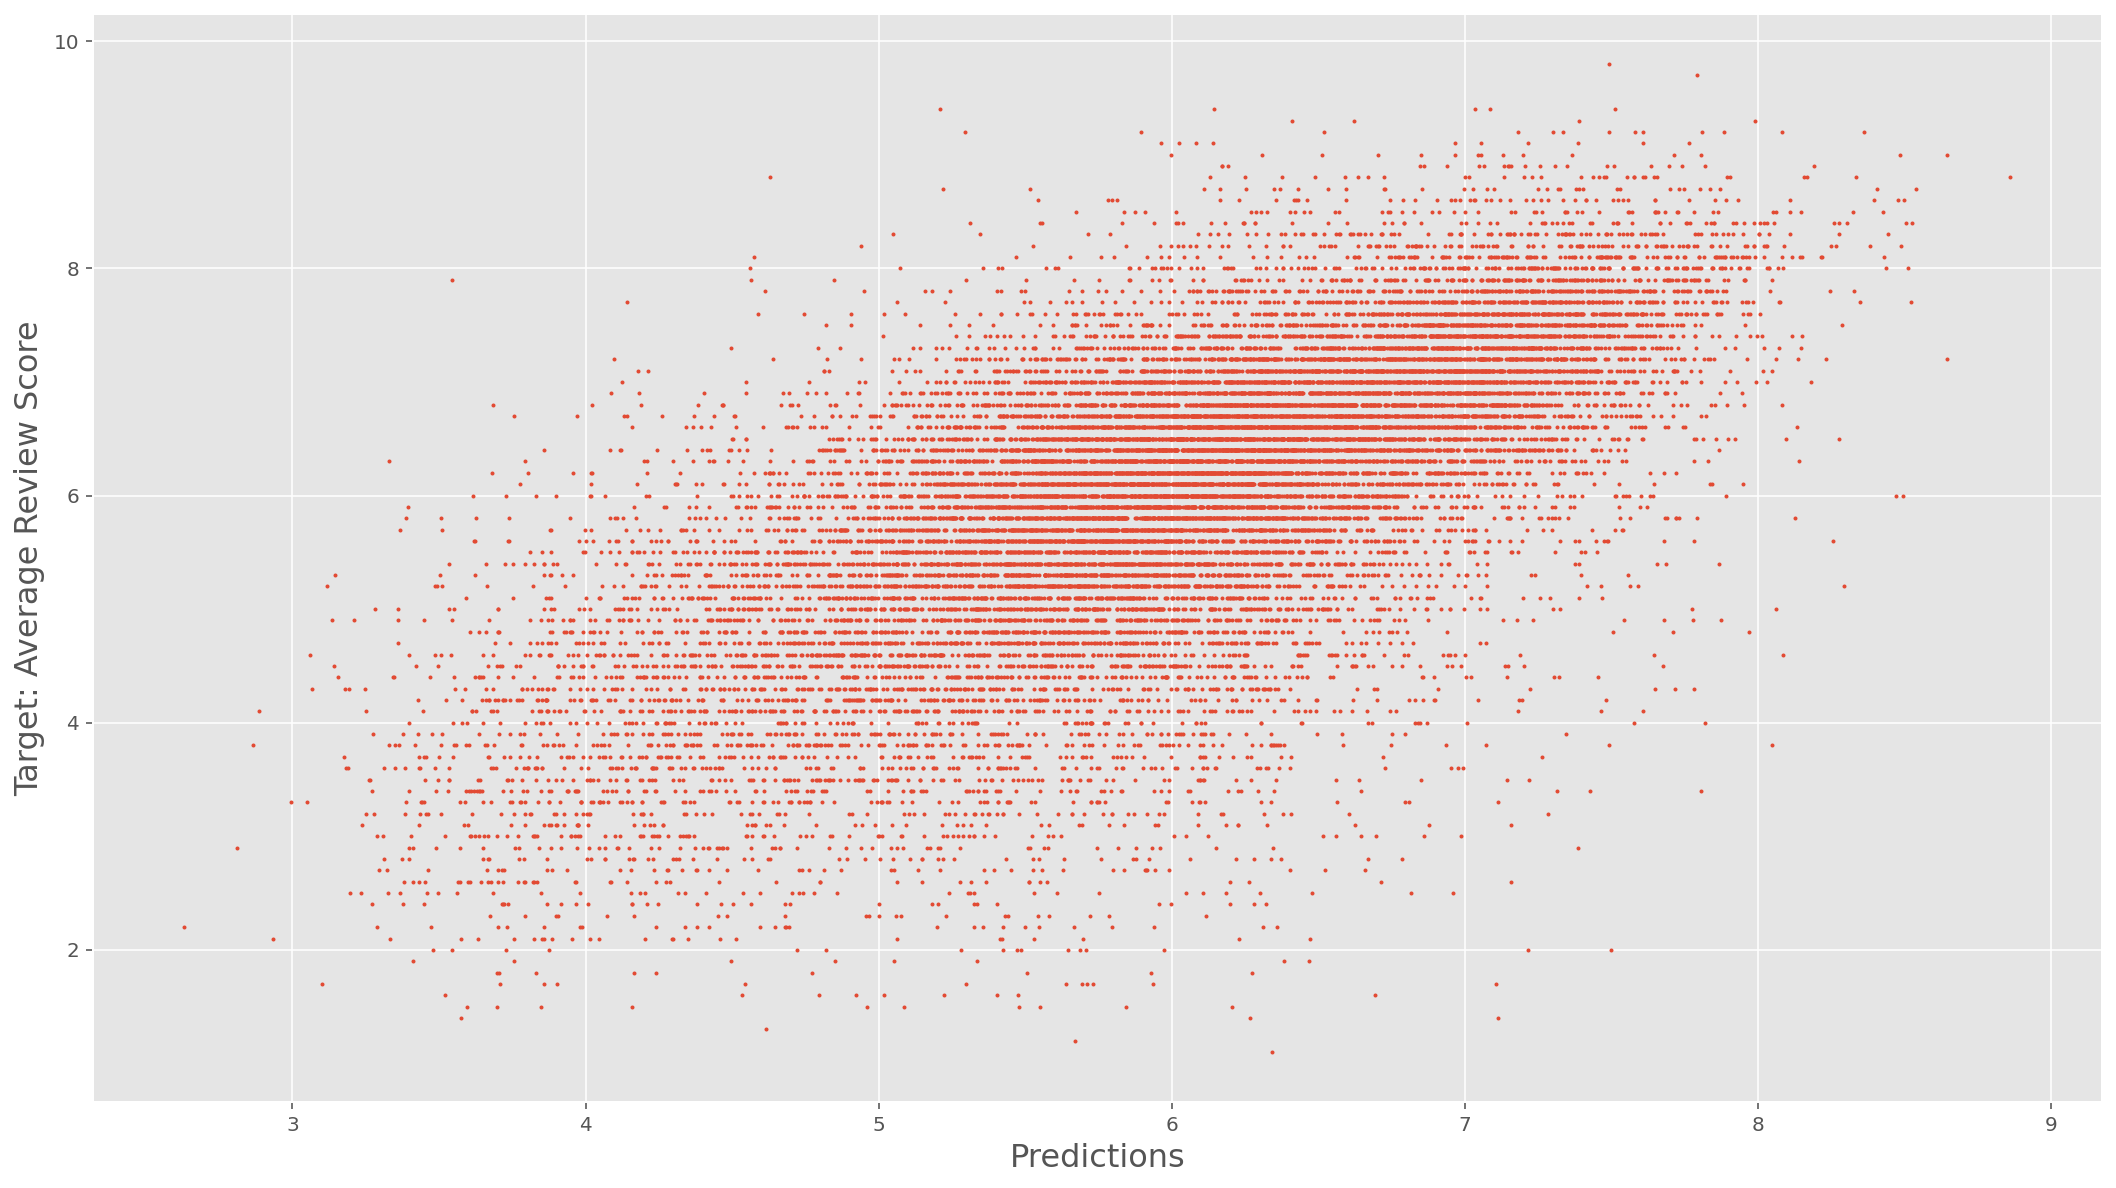

In [475]:
fig, ax = plt.subplots(figsize=(18,10))
ax.plot(test_predictions, y_test, '.', ms=2)
ax.set_xlabel('Predictions', fontsize=16)
ax.set_ylabel('Target: Average Review Score', fontsize=16)

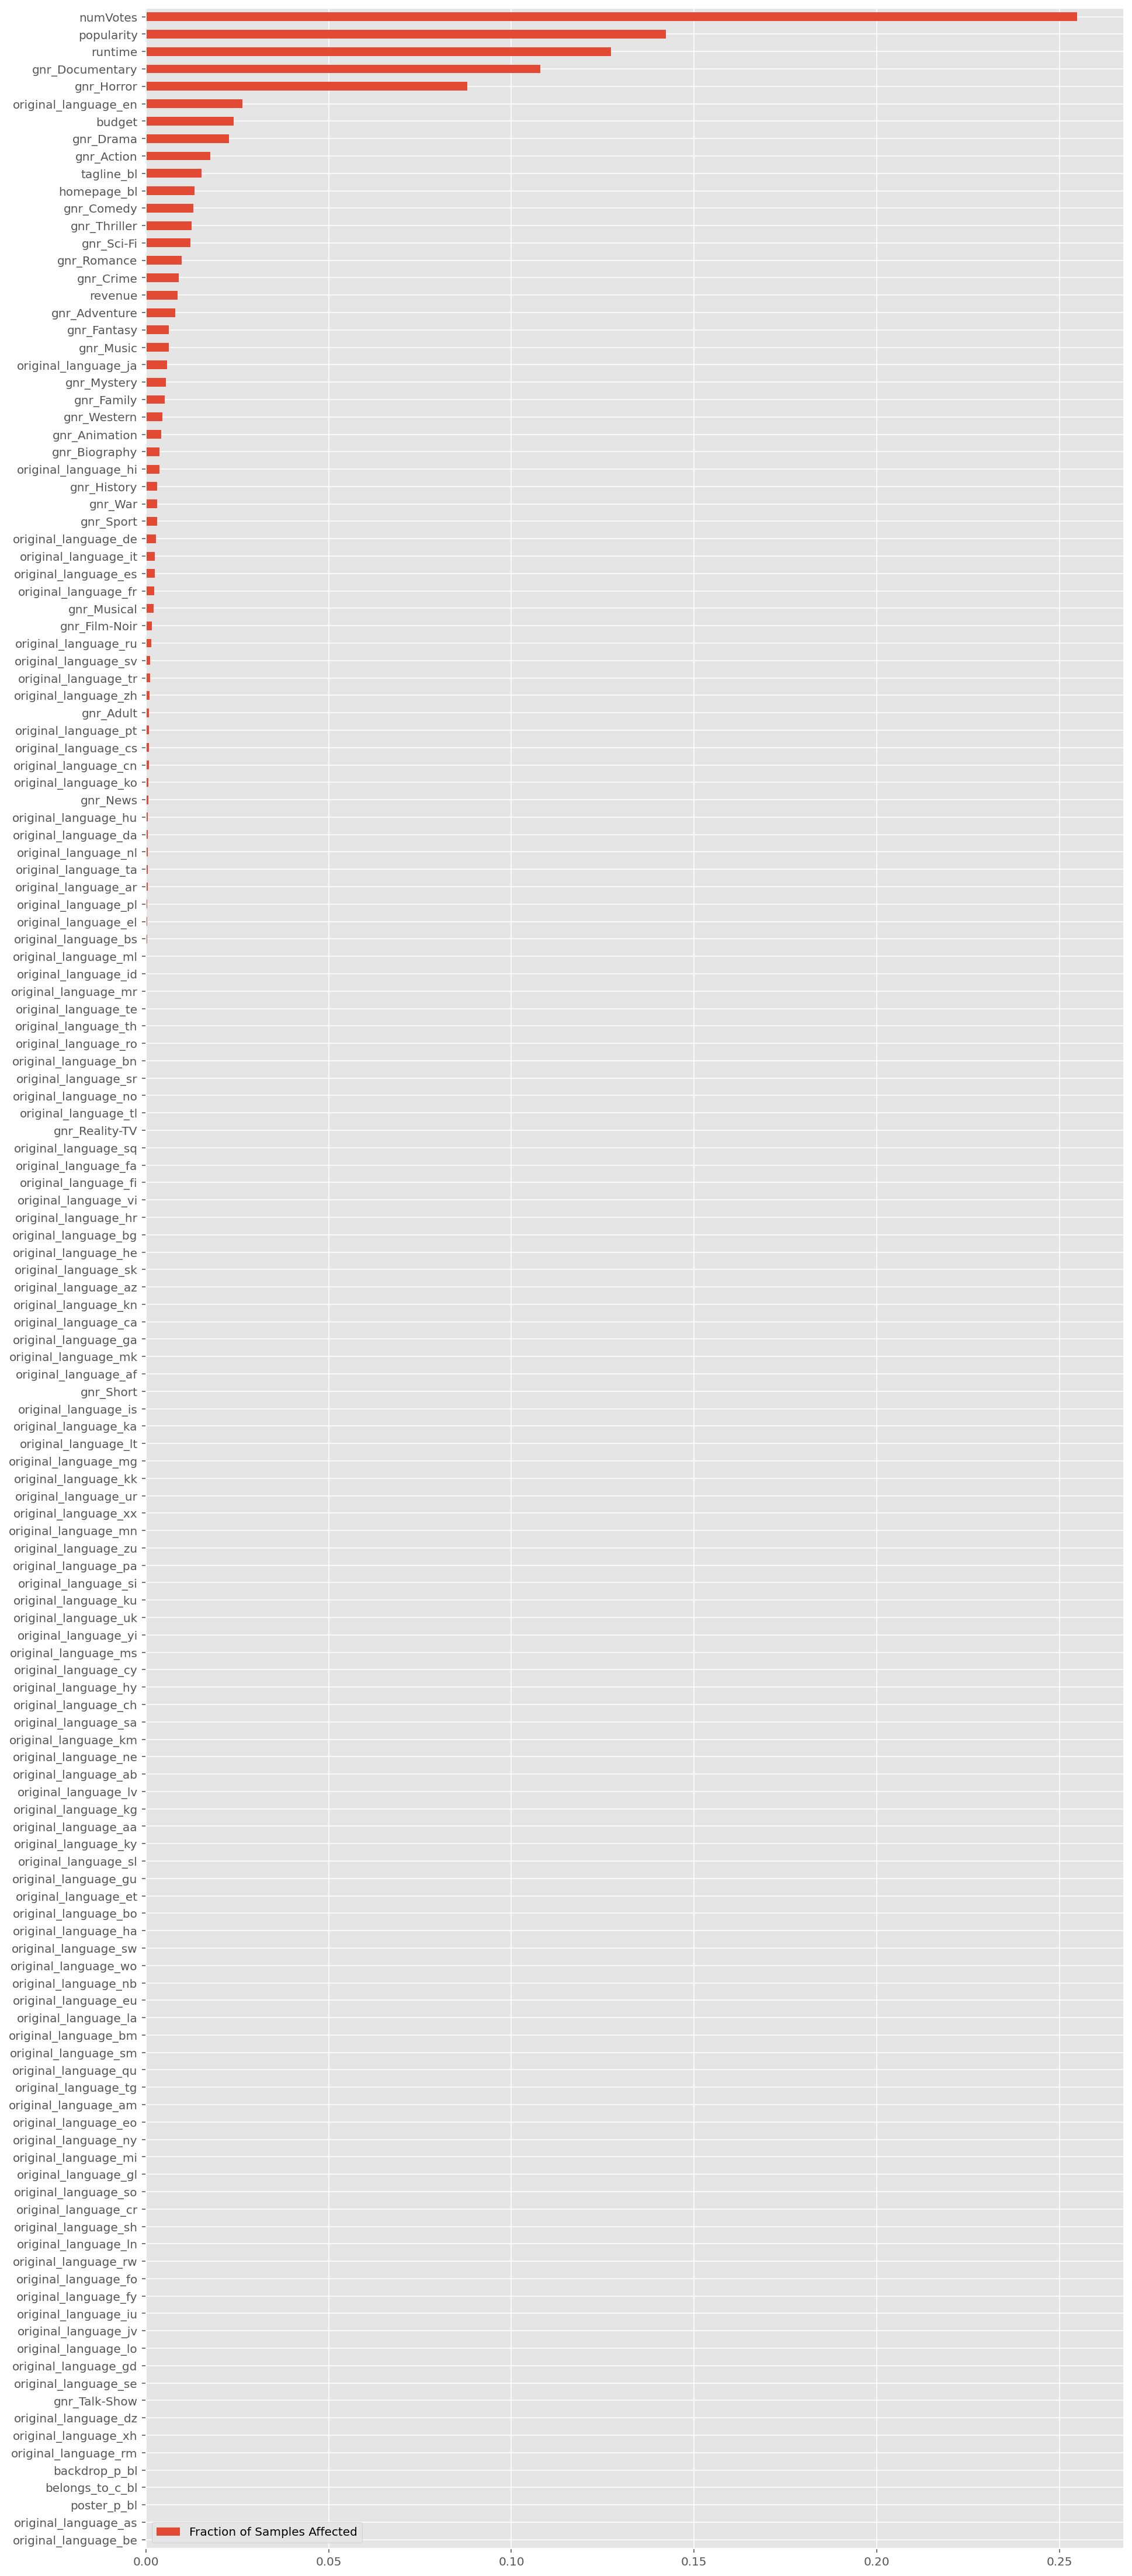

In [484]:
# Plot the feature importance
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : rfr.feature_importances_},
                           index=X.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh', figsize=(15,40));

<AxesSubplot:>

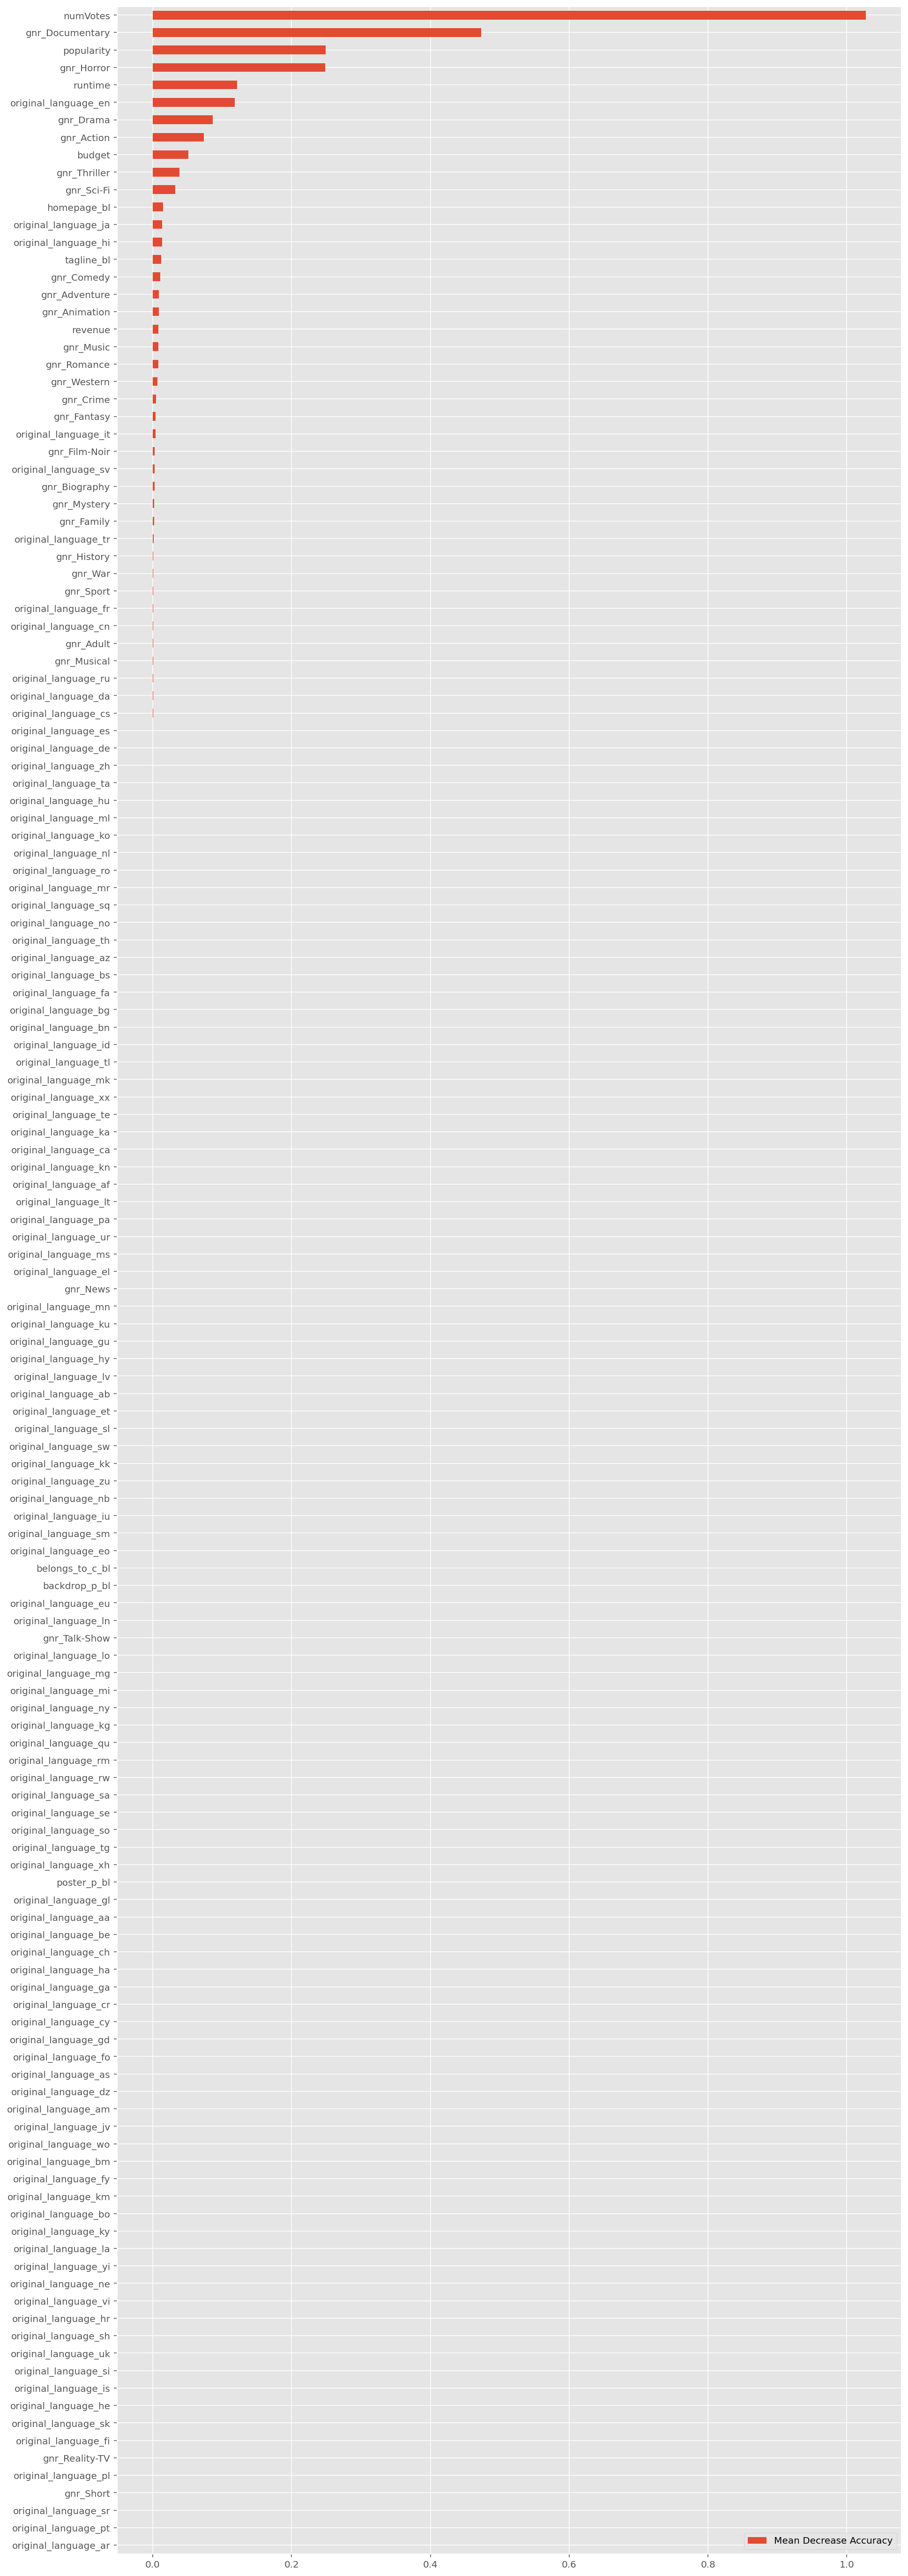

In [490]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import r2_score
from collections import defaultdict

scores = defaultdict(list)

names = X.columns
 
scores = defaultdict(list)
 
# crossvalidate the scores on a number of 
# different random splits of the data
splitter = ShuffleSplit(100, test_size=.3)

for train_idx, test_idx in splitter.split(X, y):
    X_train, X_test = X.values[train_idx], X.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]
    rfr.fit(X_train, y_train)
    acc = r2_score(y_test, rfr.predict(X_test))
    for i in range(X.shape[1]):
        X_t = X_test.copy()
        np.random.shuffle(X_t[:, i])
        shuff_acc = r2_score(y_test, rfr.predict(X_t))
        scores[names[i]].append((acc-shuff_acc)/acc)

score_series = pd.DataFrame(scores).mean()
scores = pd.DataFrame({'Mean Decrease Accuracy' : score_series})
scores.sort_values(by='Mean Decrease Accuracy').plot(kind='barh', figsize=(15,50))